# I] Import and options


In [1]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

C:\Users\kja11\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
file_directory = "/Users/kja11/OneDrive - Menntaský/PostDoc_Hypothermia/in_silico/Python/"

In [4]:
path = "1) input/experiments/"

# II] DL data

In [5]:
df = pandas.read_csv(file_directory + path + 'poz_wb_quantif.csv', sep = ",")

df

,samples,laminb1,sp1,sp1/lamin
0,37_dmso,12053.083,17757.326,1.473260
1,37_Poz,11131.962,12160.719,1.092415
2,32_dmso,11682.548,12288.962,1.051908
3,32_Poz,13528.205,13555.548,1.002021
4,37_dmso,10828.083,15650.083,1.445324
5,37_Poz,7554.962,11653.669,1.542519
6,32_dmso,11495.497,13817.497,1.201992
7,32_Poz,12249.790,14273.376,1.165194
8,37_dmso,10809.548,13049.548,1.207224
9,37_Poz,10812.255,11423.841,1.056564


In [6]:
df_37dmso = df[df.samples == '37_dmso']
df_32dmso = df[df.samples == '32_dmso']
df_37poz = df[df.samples == '37_Poz']
df_32poz = df[df.samples == '32_Poz']

for df_ in df_37dmso, df_32dmso, df_37poz, df_32poz:
    df_.reset_index(inplace=True, drop = True)

In [7]:
#Statistics T-test
# proteins = 'sp1/lamin', ''
_37dmso_label = df_37dmso.samples[0]
_32dmso_label = df_32dmso.samples[0]
_37poz_label = df_37poz.samples[0]
_32poz_label = df_32poz.samples[0]
    
# for protein in proteins:
# print(protein, '\n')
### sp1/lamin
statistic, pvalue = scipy.stats.ttest_ind(df_37dmso['sp1/lamin'], df_32dmso['sp1/lamin'])
print("the pvalue between", _37dmso_label, "and", _32dmso_label,"is", "{:.5E}".format(pvalue))

statistic, pvalue = scipy.stats.ttest_ind(df_37poz['sp1/lamin'], df_32poz['sp1/lamin'])
print("the pvalue between", _37poz_label, "and", _32poz_label,"is", "{:.5E}".format(pvalue))

statistic, pvalue = scipy.stats.ttest_ind(df_37dmso['sp1/lamin'], df_37poz['sp1/lamin'])
print("the pvalue between", _37dmso_label, "and", _37poz_label,"is", "{:.5E}".format(pvalue))

statistic, pvalue = scipy.stats.ttest_ind(df_32dmso['sp1/lamin'], df_32poz['sp1/lamin'])
print("the pvalue between", _32dmso_label, "and", _32poz_label,"is", "{:.5E}".format(pvalue))

the pvalue between 37_dmso and 32_dmso is 5.26520E-02
the pvalue between 37_Poz and 32_Poz is 2.73008E-01
the pvalue between 37_dmso and 37_Poz is 4.60932E-01
the pvalue between 32_dmso and 32_Poz is 6.20710E-01


In [8]:
# create new column for conditions, for Hue
df['conditions'] = numpy.where(df['samples'].str.contains('dmso'), 'dmso'
                               , 'poziotinib')

# Simplicy Samples column
df['samples'] = df['samples'].str.split('_').str[0] + '°C'
df.head()

,samples,laminb1,sp1,sp1/lamin,conditions
0,37°C,12053.083,17757.326,1.473260,dmso
1,37°C,11131.962,12160.719,1.092415,poziotinib
2,32°C,11682.548,12288.962,1.051908,dmso
3,32°C,13528.205,13555.548,1.002021,poziotinib
4,37°C,10828.083,15650.083,1.445324,dmso


C:\Users\kja11\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


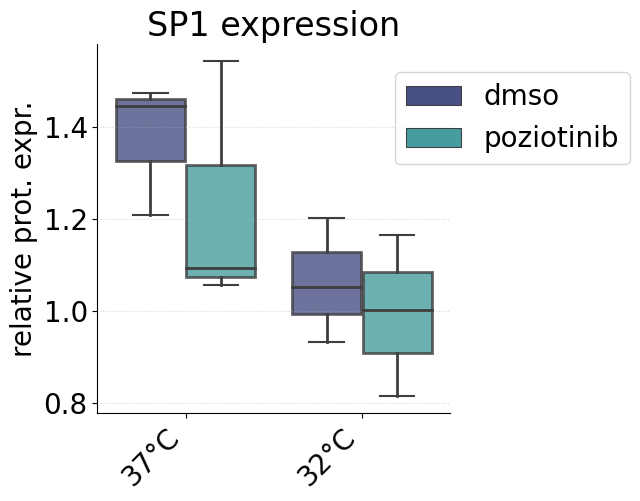

In [15]:
    #graph
    seaborn.catplot(x="samples", y="sp1/lamin", hue="conditions", 
                    kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, 
                    whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.title('SP1 expression')
    plt.xticks(rotation=45, ha= 'right')
    plt.ylabel('relative prot. expr.')
    plt.xlabel('')
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.83))

C:\Users\kja11\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\kja11\AppData\Local\Temp\ipykernel_34380\2298488193.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


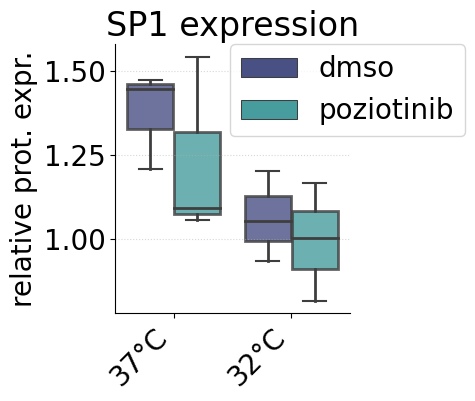

In [17]:
    #graph
    seaborn.catplot(x="samples", y="sp1/lamin", hue="conditions", 
                    height = 4, aspect= 1, kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, 
                    whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.title('SP1 expression')
    plt.xticks(rotation=45, ha= 'right')
    plt.ylabel('relative prot. expr.')
    plt.xlabel('')
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.83))